In [1]:
%install-location $cwd/swift-install
%install '.package(path: "$cwd/FastaiNotebook_00_load_data")' FastaiNotebook_00_load_data

Installing packages:
	.package(path: "/home/jmd/workspace/ml/fastai/nbs/swift/FastaiNotebook_00_load_data")
		FastaiNotebook_00_load_data
With SwiftPM flags: []
Working in: /tmp/tmpyig2rqi8/swift-install
/home/jmd/swift/usr/bin/swift-build: /home/jmd/anaconda3/lib/libcurl.so.4: no version information available (required by /home/jmd/swift/usr/lib/swift/linux/libFoundationNetworking.so)
[1/2] Compiling jupyterInstalledPackages jupyterInstalledPackages.swift
[2/3] Merging module jupyterInstalledPackages
Initializing Swift...
Installation complete!


In [2]:
import FastaiNotebook_00_load_data

In [3]:
// These are integers
let batchSize = 6
var b = 1 + (4 * batchSize)
print("some integers:", batchSize, b)

some integers: 6 25


In [4]:
// These are floating point values
var myPi = 3.1
let π    = Float.pi
print("some floats: ", myPi, π)

some floats:  3.1 3.1415925


In [5]:
batchSize = 8

: 

In [6]:
// Type inference would produce an integer, but we make this be a float.
var someFloat : Float = 1 + 4*9

// Jeremy might not like greek letters, but he surely loves emoji 😬
var 🐶💩 = "dog poo"
print(🐶💩)


// This is the equivalent of the Python 'type' operator.
print("some types: ", type(of: someFloat), type(of: 🐶💩))

dog poo
some types:  Float String


In [7]:
func distance(x: Float, y: Float) -> Float {
    return sqrt(x*x+y*y)
}

// Functions default to having argument labels:
distance(x: 1.0, y: 2.0)

2.236068


In [8]:
func sincos(_ value: Float) -> (Float, Float) {
    return (sin(value), cos(value))
}

sincos(2*π)

▿ 2 elements
  - .0 : -3.019916e-07
  - .1 : 1.0


In [9]:
let (s, c) = sincos(42)
s + c

-1.3165069


In [10]:
let tupleValue = sincos(213)
tupleValue.1

0.8090276


In [11]:
struct ComplexF {
    var real, imag : Float
}

var someComplex = ComplexF(real: 1.0, imag: 12.0)
print(someComplex)

ComplexF(real: 1.0, imag: 12.0)


In [12]:
struct Complex<T : SignedNumeric> {
    var real, imag: T
    
    // This is a read only computed property.
    var conj : Complex { return Complex(real: real, imag: -imag)}
    
    // Here's a computed propety with a setter, that returns the imaginary
    // comonent negated, just to show how to do this. A more realistic
    // use case would be to provide a polar coordinate projection.
    var imagNegated : T {
        get { return -imag }
        set { imag = -newValue }
    }
}

In [13]:
var complexInt = Complex(real: 1, imag: 12)
var complexDouble = Complex(real: 1.0, imag: π)
print(complexInt, complexDouble, separator: "\n")

Complex<Int>(real: 1, imag: 12)
Complex<Float>(real: 1.0, imag: 3.1415925)


In [14]:
print("Conj:     ", complexInt.conj)

Conj:      Complex<Int>(real: 1, imag: -12)


In [15]:
print("property: ", complexInt.imag, complexInt.imagNegated)
complexInt.imagNegated = 4
print(complexInt)

property:  12 -12
Complex<Int>(real: 1, imag: -4)


In [16]:
extension Complex {
    func add(_ other: Complex) -> Complex {
        return Complex(real: real + other.real,
                       imag: imag + other.imag)
    }
}

In [17]:
print("☑️Original: ", complexDouble)
print("⤴️Moved:    ", complexDouble.add(Complex(real: 10, imag: 10)))
print("2️⃣Doubled:  ", complexDouble.add(complexDouble))


☑️Original:  Complex<Float>(real: 1.0, imag: 3.1415925)
⤴️Moved:     Complex<Float>(real: 11.0, imag: 13.141592)
2️⃣Doubled:   Complex<Float>(real: 2.0, imag: 6.283185)


In [18]:
extension Complex {
    static func + (lhs: Complex, rhs: Complex) -> Complex {
        return Complex(real: lhs.real + lhs.real,
                      imag: lhs.imag + rhs.imag)
    }
}
print("added: ", complexInt + complexInt)

added:  Complex<Int>(real: 2, imag: -8)


In [19]:
prefix operator √

prefix func √(value: Complex<Float>) -> (Complex<Float>, Complex<Float>) {
    
    return (value, value)
}

let (root1, root2) = √complexDouble
print(root1)

Complex<Float>(real: 1.0, imag: 3.1415925)


In [20]:
#if canImport(PythonKit)
    import PythonKit
#else
    import Python
#endif

In [21]:
public let np = Python.import("numpy")
public let plt = Python.import("matplotlib.pyplot")

In [22]:
let npArray = np.array([1,2,3,4])
npArray

[1 2 3 4]


In [23]:
import TensorFlow
let (xTrain, yTrain, xValid, yValid) = loadMNIST(path: mnistPath, flat: true)

In [24]:
print(type(of: xTrain))
print(xTrain.shape, yTrain.shape, xValid.shape, yValid.shape, separator: "\n")


Tensor<Float>
[60000, 784]
[60000]
[10000, 784]
[10000]


In [25]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [26]:
let img = xTrain[0].makeNumpyArray().reshape(28, 28)

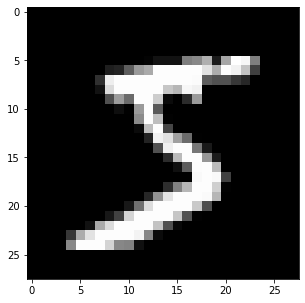

None


In [27]:
plt.figure(figsize: [5,5])
plt.show(plt.imshow(X: img, cmap: "gray"))

In [28]:
print("NumPy Module Type: ", type(of: np))
print("NumPy Function Type: ", type(of: np.array))
print("NumPy Array Type: ", type(of: npArray))
print(npArray*2, npArray[1])

print(Python.type(npArray))
print(npArray.__class__)

NumPy Module Type:  PythonObject
NumPy Function Type:  PythonObject
NumPy Array Type:  PythonObject
[2 4 6 8] 2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [29]:
// Really simple math
func squareAdd(n: Float) -> Float {
    let tmp = n * n
    let result = tmp + 1.0
    return result
}

In [30]:
var someInt = 42
print(type(of: someInt._value))
print(type(of: π._value))


Builtin.Int64
Builtin.FPIEEE32


In [31]:
import Builtin

In [32]:
extension Int {
  var isOdd : Bool { return self & 1 != 0 }
}

extension Bool {
  var symbol : String { return self ? "👍" : "👎" }
}


In [33]:
print("""
      Feeling odd?
        Lets check  4: \(     4.isOdd         )
        what about 17: \(    17.isOdd         )
        Lets check  4: \(     4.isOdd.symbol  )
        What about 17: \(    17.isOdd.symbol  )
      """)

Feeling odd?
  Lets check  4: false
  what about 17: true
  Lets check  4: 👎
  What about 17: 👍


In [34]:
var myArray = [1,2,3,4,5,6]

In [35]:
var myArray2 : [Int] = myArray

In [36]:
var myArray3 : Array<Int> = myArray

In [37]:
print(type(of: myArray), type(of: myArray2), type(of: myArray3))

Array<Int> Array<Int> Array<Int>


In [38]:
// Standard `for` loop
for x in myArray {
    print(x)
}

1
2
3
4
5
6


In [39]:
print("element:", myArray[0])
print("slice:  ", myArray[1...3])  // inclusive - includes "3"
print("slice:  ", myArray[1..<3])  // exclusive

element: 1
slice:   [2, 3, 4]
slice:   [2, 3]


In [40]:
print("mapped:   ", myArray.map({ arg in arg + 10 }))

mapped:    [11, 12, 13, 14, 15, 16]


In [41]:
print("filtered: ", myArray.filter({ $0.isOdd }))

filtered:  [1, 3, 5]


In [42]:
print("oddity:   ", myArray.map{ $0.isOdd.symbol })
print("processed:", myArray.map{ $0*3 }.filter{ $0.isOdd })

oddity:    ["👍", "👎", "👍", "👎", "👍", "👎"]
processed: [3, 9, 15]


In [43]:
print("sum: ", myArray.reduce(0, +))

sum:  21


In [44]:
extension Array where Element : Numeric {
    func doubleElements() -> Array {
        return self.map { $0 * 2 }
    }
}

print([1,2,3].doubleElements())

[2, 4, 6]


In [45]:
print([true, false, true].doubleElements())

: 